In [308]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity


In [309]:
image = cv2.imread('image\sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

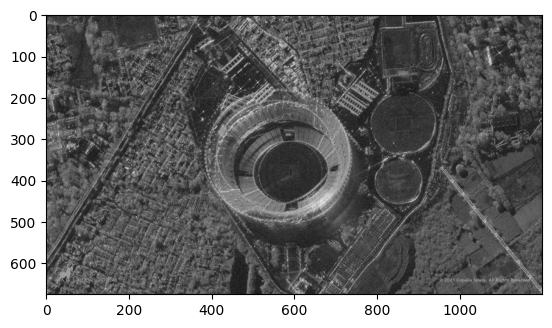

In [310]:
plt.imshow(image_gray, cmap="gray")

In [311]:
mean = 0#-сдвиг(прикиним что 20)
stddev = 100# большинство значений в диапозоне [-100 100], но если сдвиг 20 то [-80;120]
noise_gauss = np.zeros(image_gray.shape, np.uint8) # - создаём масив размера как исходное изображение(image_gray.shape - размер масива н.и)
cv2.randn(noise_gauss, mean, stddev) # - заполняем его
gnoisy_image = image_gray.astype(np.int16)+noise_gauss
gnoisy_image = np.clip(gnoisy_image, 0, 255).astype(np.uint8)

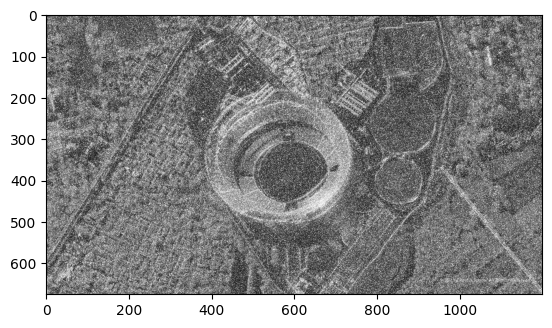

In [312]:
plt.imshow(gnoisy_image, cmap="gray")

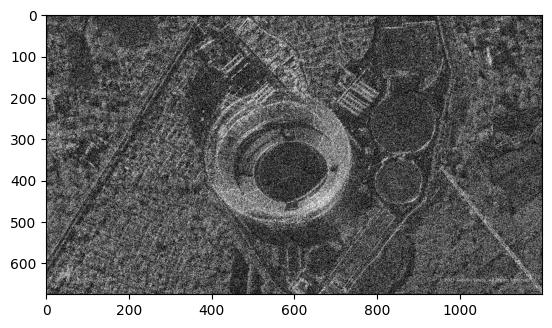

In [313]:
a = -100  # минимальное значение шума
b = 100   # максимальное значение шума
uniform_noise = np.random.uniform(a, b, image_gray.shape) # создает массив случайных чисел с равномерным распределением
noisy_image = image_gray.astype(np.int16) + uniform_noise#тут мы накладываем шум на изображение, которое мы считываем как int16(чтоб переполнения не было)
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)# а тут мы преобразуем обратно
plt.imshow(noisy_image, cmap="gray")

In [314]:
gimage_gauss_gauss = cv2.GaussianBlur(gnoisy_image,(5,5),0)#гаусс
gimage_gauss_bilat = cv2.bilateralFilter(gnoisy_image,9,75,75)#билатериальный фильтр
gimage_gauss_nlm = cv2.fastNlMeansDenoising(gnoisy_image, h = 20)# фильтр нелокальных средних
gimage_gauss_median = cv2.medianBlur(gnoisy_image, 5)#медианный фильтр

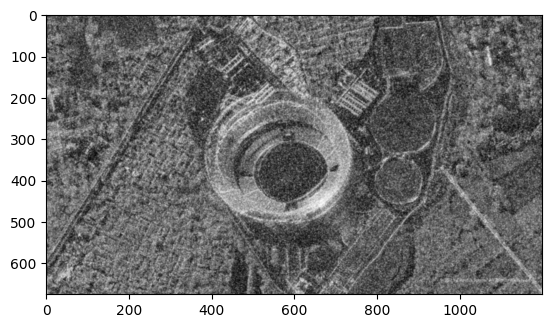

In [315]:
plt.imshow(gimage_gauss_gauss, cmap="gray")

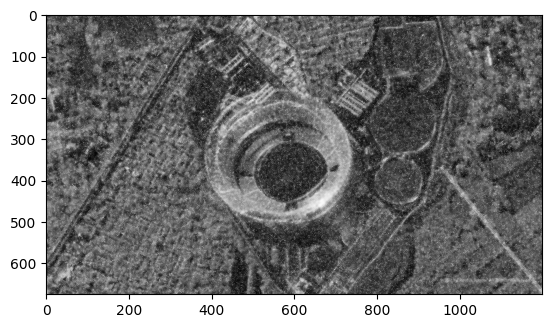

In [316]:
plt.imshow(gimage_gauss_bilat, cmap="gray")

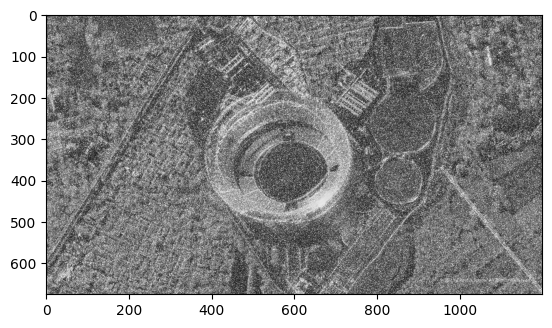

In [317]:
plt.imshow(gimage_gauss_nlm, cmap="gray")

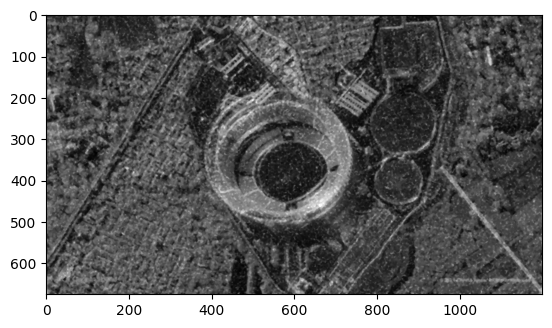

In [318]:
plt.imshow(gimage_gauss_median, cmap="gray")

In [319]:
gmse1 = mean_squared_error(image_gray, gimage_gauss_gauss)
gssim1 = structural_similarity(image_gray, gimage_gauss_gauss, data_range=255)

print(f"MSE-gaus: {gmse1}")
print(f"SSIM-gaus: {gssim1}")

gmse2 = mean_squared_error(image_gray, gimage_gauss_bilat)
gssim2 = structural_similarity(image_gray, gimage_gauss_bilat, data_range=255)

print(f"MSE-bilat: {gmse2}")
print(f"SSIM-bilat: {gssim2}")

gmse3 = mean_squared_error(image_gray, gimage_gauss_nlm)
gssim3 = structural_similarity(image_gray, gimage_gauss_nlm, data_range=255)

print(f"MSE-nlm: {gmse3}")
print(f"SSIM-nlm: {gssim3}")

gmse4 = mean_squared_error(image_gray, gimage_gauss_median)
gssim4 = structural_similarity(image_gray, gimage_gauss_median, data_range=255)

print(f"MSE-madian: {gmse4}")
print(f"SSIM-median: {gssim4}")


MSE-gaus: 1766.9646851851849
SSIM-gaus: 0.48469977388841157
MSE-bilat: 1844.5999012345676
SSIM-bilat: 0.31373573508598596
MSE-nlm: 4237.894787654321
SSIM-nlm: 0.18727335338964535
MSE-madian: 704.1574580246913
SSIM-median: 0.46888317696602005


In [320]:
metrics = {
    'Gaussian': {'MSE': gmse1, 'SSIM': gssim1},
    'Bilateral': {'MSE': gmse2, 'SSIM': gssim2},
    'NLM': {'MSE':gmse3, 'SSIM': gssim3},
    'Median': {'MSE': gmse4, 'SSIM': gssim4}
}

best_mse = min(metrics.items(), key=lambda x: x[1]['MSE'])# metrics.items() возвращает все пары ключ-значение ( key=lambda x: x[1]-вот это значение['MSE'] - берёт значение MSE)
best_ssim = max(metrics.items(), key=lambda x: x[1]['SSIM'])#add = lambda x, y: x + y - короче в джаве это add = (x, y) -> x + y;

print(f"Лучший по MSE: {best_mse[0]} (MSE = {best_mse[1]['MSE']:.2f})")
print(f"Лучший по SSIM: {best_ssim[0]} (SSIM = {best_ssim[1]['SSIM']:.4f})")

Лучший по MSE: Median (MSE = 704.16)
Лучший по SSIM: Gaussian (SSIM = 0.4847)


In [321]:
image_gauss = cv2.GaussianBlur(noisy_image,(5,5),0)#гаусс
image_bilat = cv2.bilateralFilter(noisy_image,9,75,75)#билатериальный фильтр
image_nlm = cv2.fastNlMeansDenoising(noisy_image, h = 20)# фильтр нелокальных средних
image_median = cv2.medianBlur(noisy_image, 5)#медианный фильтр

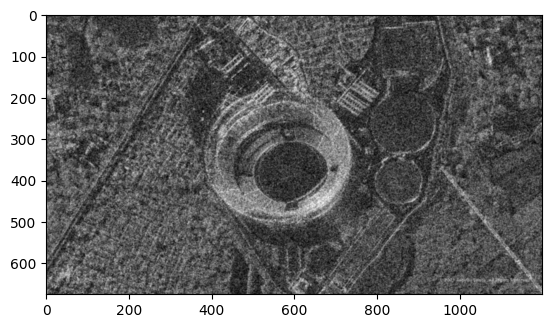

In [322]:
plt.imshow(image_gauss, cmap="gray")

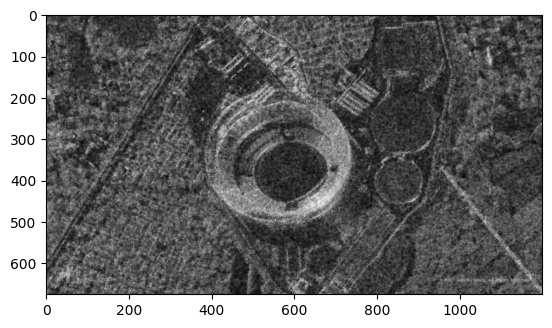

In [323]:
plt.imshow(image_bilat, cmap="gray")

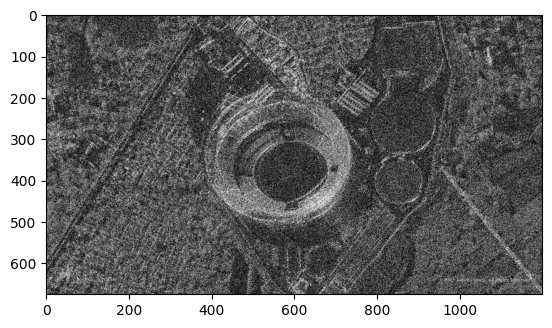

In [324]:
plt.imshow(image_nlm, cmap="gray")

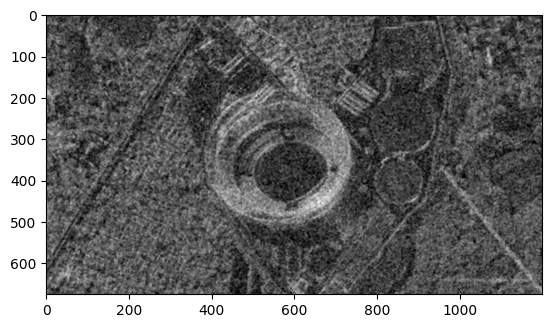

In [325]:
plt.imshow(image_median, cmap="gray")

In [326]:
mse1 = mean_squared_error(image_gray, image_gauss)
ssim1 = structural_similarity(image_gray, image_gauss, data_range=255)

print(f"MSE-gaus: {mse1}")
print(f"SSIM-gaus: {ssim1}")

mse2 = mean_squared_error(image_gray, image_bilat)
ssim2 = structural_similarity(image_gray, image_bilat, data_range=255)

print(f"MSE-bilat: {mse2}")
print(f"SSIM-bilat: {ssim2}")

mse3 = mean_squared_error(image_gray, image_nlm)
ssim3 = structural_similarity(image_gray, image_nlm, data_range=255)

print(f"MSE-nlm: {mse3}")
print(f"SSIM-nlm: {ssim3}")

mse4 = mean_squared_error(image_gray, image_median)
ssim4 = structural_similarity(image_gray, image_median, data_range=255)

print(f"MSE-madian: {mse4}")
print(f"SSIM-median: {ssim4}")

MSE-gaus: 353.42937530864197
SSIM-gaus: 0.5079661008439312
MSE-bilat: 703.1998987654321
SSIM-bilat: 0.34559922742227595
MSE-nlm: 2914.867316049382
SSIM-nlm: 0.17752574064179366
MSE-madian: 559.7937061728395
SSIM-median: 0.35290284128315796


In [327]:
metrics = {
    'Gaussian': {'MSE': mse1, 'SSIM': ssim1},
    'Bilateral': {'MSE': mse2, 'SSIM': ssim2},
    'NLM': {'MSE': mse3, 'SSIM': ssim3},
    'Median': {'MSE': mse4, 'SSIM': ssim4}
}

best_mse = min(metrics.items(), key=lambda x: x[1]['MSE'])# metrics.items() возвращает все пары ключ-значение ( key=lambda x: x[1]-вот это значение['MSE'] - берёт значение MSE)
best_ssim = max(metrics.items(), key=lambda x: x[1]['SSIM'])#add = lambda x, y: x + y - короче в джаве это add = (x, y) -> x + y;

print(f"Лучший по MSE: {best_mse[0]} (MSE = {best_mse[1]['MSE']:.2f})")
print(f"Лучший по SSIM: {best_ssim[0]} (SSIM = {best_ssim[1]['SSIM']:.4f})")

Лучший по MSE: Gaussian (MSE = 353.43)
Лучший по SSIM: Gaussian (SSIM = 0.5080)
